In [2]:
from __future__ import print_function
from __future__ import division

%matplotlib inline

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# load the provided data
train_features = pd.read_csv('./data-processed/dengue_features_train.csv',
                             index_col=[0,1,2])

train_labels = pd.read_csv('./data-processed/dengue_labels_train.csv',
                           index_col=[0,1,2])

In [13]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

In [4]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 21)
labels  :  (936, 1)

Iquitos
features:  (520, 21)
labels  :  (520, 1)


Text(0.5, 0, 'Time')

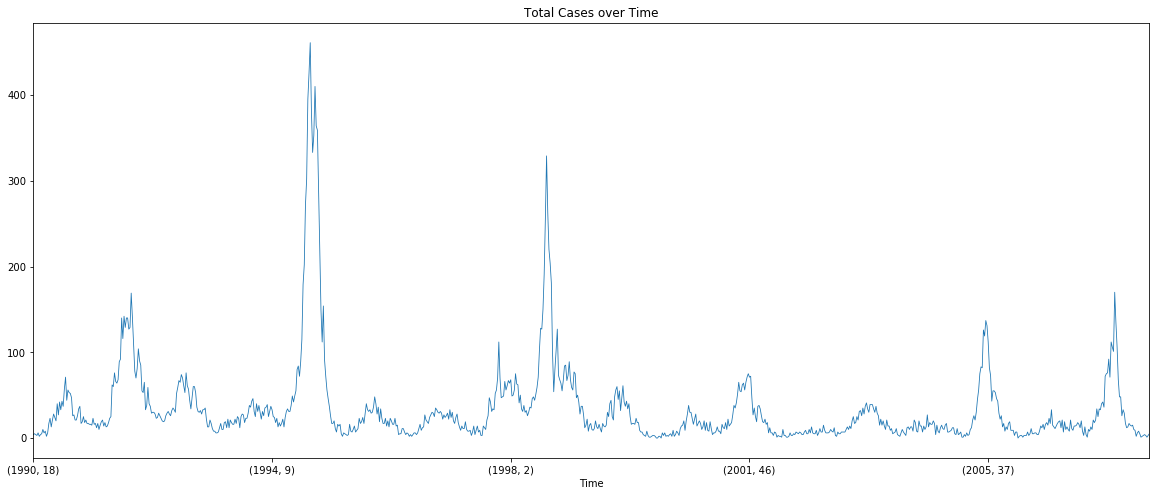

In [5]:
fig, ax = plt.subplots(figsize=(20,8))
(sj_train_labels
     .total_cases
     .plot
     .line(lw=0.8))

plt.title('Total Cases over Time')
plt.xlabel('Time')

In [6]:
# Remove `week_start_date` string.
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)

In [7]:
# Null check
pd.isnull(sj_train_features).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

Text(0.5, 0, 'Time')

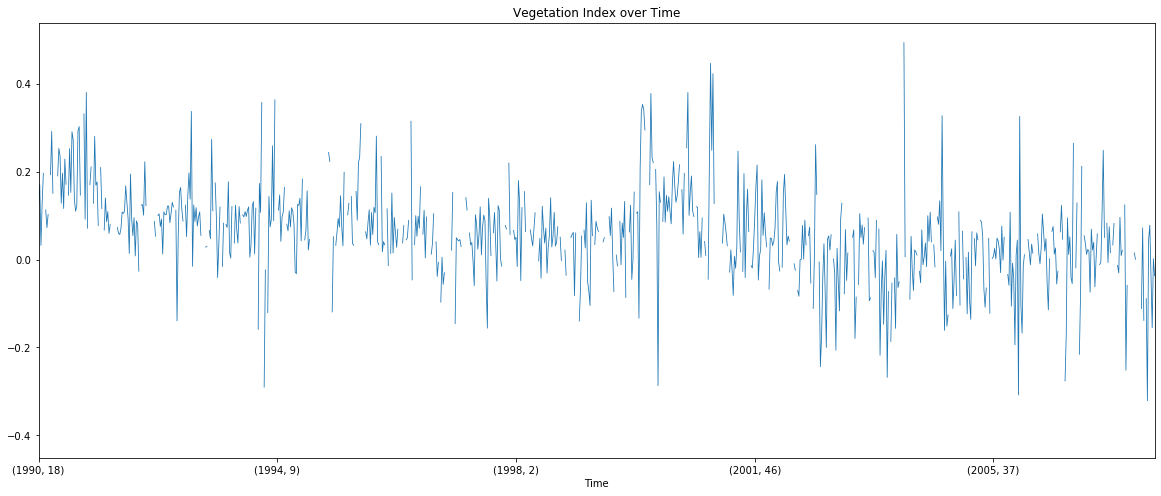

In [8]:
fig, ax = plt.subplots(figsize=(20,8))
(sj_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))

plt.title('Vegetation Index over Time')
plt.xlabel('Time')

In [9]:
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

# sj_train_features.dropna(inplace=True)

Text(0.5, 0, 'Time')

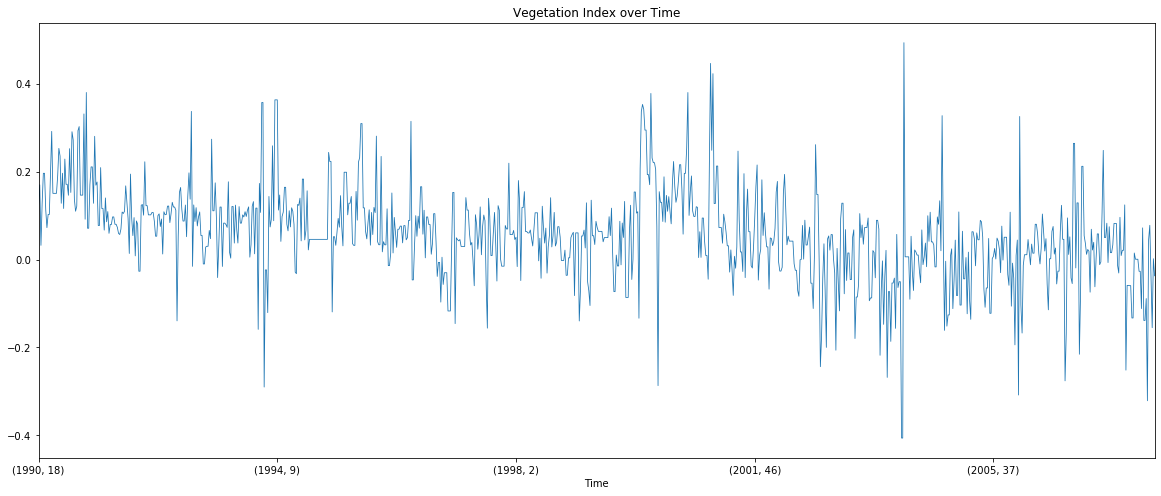

In [10]:
fig, ax = plt.subplots(figsize=(20,8))
(sj_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))

plt.title('Vegetation Index over Time')
plt.xlabel('Time')

In [11]:
# Null check
pd.isnull(sj_train_features).any()

ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

In [12]:
print('San Juan')
print('mean: ', sj_train_labels.mean()[0])
print('var :', sj_train_labels.var()[0])

print('\nIquitos')
print('mean: ', iq_train_labels.mean()[0])
print('var :', iq_train_labels.var()[0])

San Juan
mean:  34.18055555555556
var : 2640.0454396910277

Iquitos
mean:  7.565384615384615
var : 115.89552393656439


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000240198A3048>]],
      dtype=object)

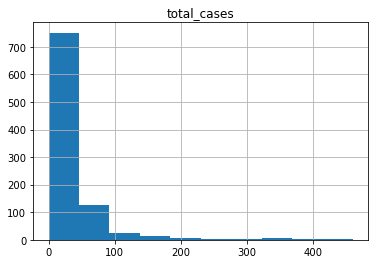

In [13]:
sj_train_labels.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000240198A3A20>]],
      dtype=object)

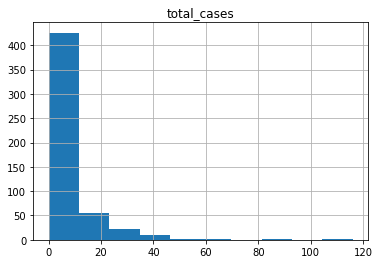

In [14]:
iq_train_labels.hist()

In [15]:
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases

# sj_train_features.drop(sj_train_features.index[0], inplace=True)
# iq_train_features.drop(iq_train_features.index[0], inplace=True)

# sj_train_features['previous_week'] = 0
# iq_train_features['previous_week'] = 0


In [16]:
# sj_train_features.head(10)

In [17]:
# for i in range(sj_train_features.shape[0]):
#     sj_train_features['previous_week'][i] = sj_train_labels.total_cases[i]

In [18]:
# for i in range(iq_train_features.shape[0]):
#     iq_train_features['previous_week'][i] = iq_train_labels.total_cases[i]

In [19]:
sj_train_features.head(20)
# sj_train_features.shape[0]

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
1990 18          0.122600  0.103725  0.198483  0.177617                 12.42   
     19          0.169900  0.142175  0.162357  0.155486                 22.82   
     20          0.032250  0.172967  0.157200  0.170843                 34.54   
     21          0.128633  0.245067  0.227557  0.235886                 15.36   
     22          0.196200  0.262200  0.251200  0.247340                  7.52   
     23          0.196200  0.174850  0.254314  0.181743                  9.58   
     24          0.112900  0.092800  0.205071  0.210271                  3.48   
     25          0.072500  0.072500  0.151471  0.133029                151.12   
     26          0.102450  0.146175  0.125571  0.123600                 19.32   
     27          0.102450  0.121550  0.160683  0.202567                 14.41   
     28          0.192875  0.082350  0.191943  0.152929                 22.27   
     29          0.291600  0.211800  0.301200  0.280667                 59.17   
     30          0.150567  0.171700  0.226900  0.214557                 16.48   
     31          0.150567  0.247150  0.379700  0.381357                 32.66   
     32          0.150567  0.064333  0.164443  0.138857                 28.80   
     33          0.150567  0.128033  0.206957  0.168243                 90.75   
     34          0.190233  0.168800  0.167657  0.172286                 32.40   
     35          0.252900  0.330750  0.264171  0.284314                 40.94   
     36          0.235400  0.200025  0.283817  0.230443                 28.86   
     37          0.127967  0.437100  0.123400  0.148283                 64.56   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
year weekofyear                                                 
1990 18                     297.572857             297.742857   
     19                     298.211429             298.442857   
     20                     298.781429             298.878571   
     21                     298.987143             299.228571   
     22                     299.518571             299.664286   
     23                     299.630000             299.764286   
     24                     299.207143             299.221429   
     25                     299.591429             299.528571   
     26                     299.578571             299.557143   
     27                     300.154286             300.278571   
     28                     299.512857             299.592857   
     29                     299.667143             299.750000   
     30                     299.558571             299.635714   
     31                     299.862857             299.950000   
     32                     300.391429             300.478571   
     33                     299.958571             299.957143   
     34                     300.332857             300.414286   
     35                     300.118571             300.221429   
     36                     300.530000             300.635714   
     37                     300.674286             300.792857   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
year weekofyear                                                           
1990 18                           292.414286                      299.8   
     19                           293.951429                      300.9   
     20                           295.434286                      300.5   
     21                           295.310000                      301.4   
     22                           295.821429                      301.9   
     23                           295.851429                      302.4   
     24                           295.865714                      301.3   
     25                           296.531429                      300.6   
     26                           296.378571          

In [20]:
iq_train_features.head(20)
# iq_train_features.shape[0]

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
2000 26          0.192886  0.132257  0.340886  0.247200                 25.41   
     27          0.216833  0.276100  0.289457  0.241657                 60.61   
     28          0.176757  0.173129  0.204114  0.128014                 55.52   
     29          0.227729  0.145429  0.254200  0.200314                  5.60   
     30          0.328643  0.322129  0.254371  0.361043                 62.76   
     31          0.205529  0.190757  0.231671  0.255314                 16.24   
     32          0.312486  0.329986  0.380586  0.387271                 89.37   
     33          0.384133  0.392240  0.341780  0.382750                 42.08   
     34          0.408157  0.322157  0.406714  0.302714                 49.22   
     35          0.332043  0.321057  0.314614  0.324257                 53.65   
     36          0.295586  0.295683  0.312214  0.265929                 23.12   
     37          0.284657  0.309757  0.387883  0.328157                 34.62   
     38          0.348814  0.295717  0.404843  0.242571                 97.55   
     39          0.175686  0.099483  0.225714  0.182786                 95.89   
     40          0.337540  0.276943  0.277500  0.255050                 46.22   
     41          0.223533  0.133914  0.349800  0.100917                 31.10   
     42          0.274800  0.187057  0.373943  0.279471                 25.21   
     43          0.367300  0.305550  0.455380  0.325800                 49.25   
     44          0.295100  0.211520  0.304400  0.279617                 67.64   
     45          0.271367  0.151567  0.347250  0.231867                 51.83   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
year weekofyear                                                 
2000 26                     296.740000             298.450000   
     27                     296.634286             298.428571   
     28                     296.415714             297.392857   
     29                     295.357143             296.228571   
     30                     296.432857             297.635714   
     31                     297.191429             298.285714   
     32                     297.320000             298.978571   
     33                     297.627143             299.335714   
     34                     298.238571             299.571429   
     35                     299.218571             300.928571   
     36                     300.802857             301.935714   
     37                     299.858571             301.371429   
     38                     297.435714             298.514286   
     39                     299.355714             300.885714   
     40                     298.372857             300.500000   
     41                     298.474286             300.285714   
     42                     299.211429             301.150000   
     43                     299.541429             301.100000   
     44                     299.440000             300.821429   
     45                     300.748571             301.807143   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
year weekofyear                                                           
2000 26                           295.184286                      307.3   
     27                           295.358571                      306.6   
     28                           295.622857                      304.5   
     29                           292.797143                      303.6   
     30                           293.957143                      307.0   
     31                           291.725714                      306.2   
     32                           293.821429                      308.8   
     33                           293.992857                      307.9   
     34                           292.904286          

In [21]:
# compute the correlations
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

Text(0.5, 1, 'San Juan Variable Correlations')

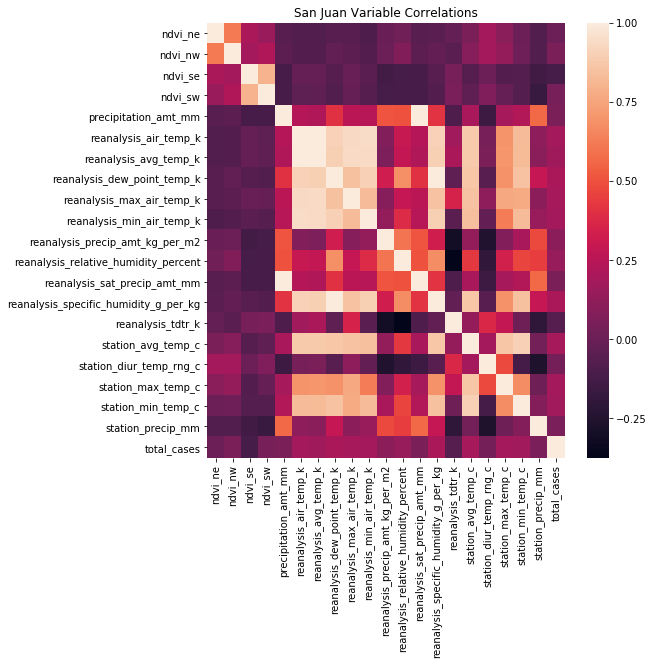

In [22]:
# plot san juan
fig, ax = plt.subplots(figsize=(8,8))
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')

Text(0.5, 1, 'Iquitos Variable Correlations')

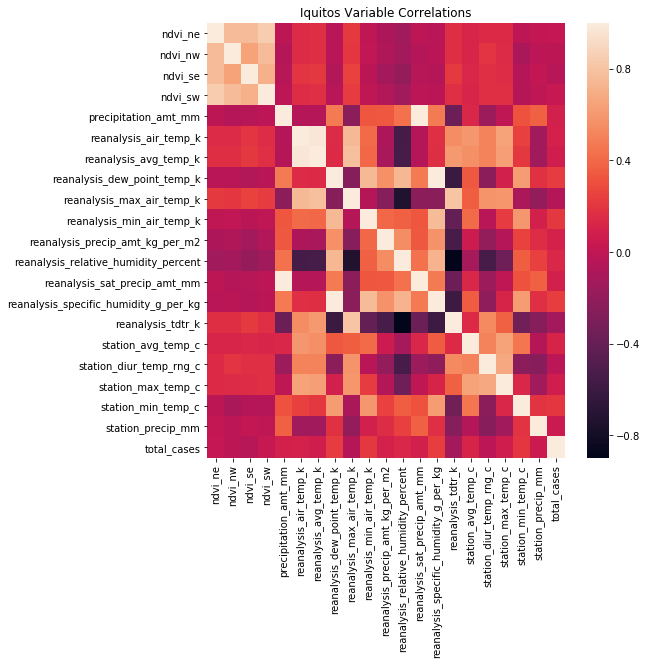

In [23]:
# plot iquitos
fig, ax = plt.subplots(figsize=(8,8))
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitos Variable Correlations')

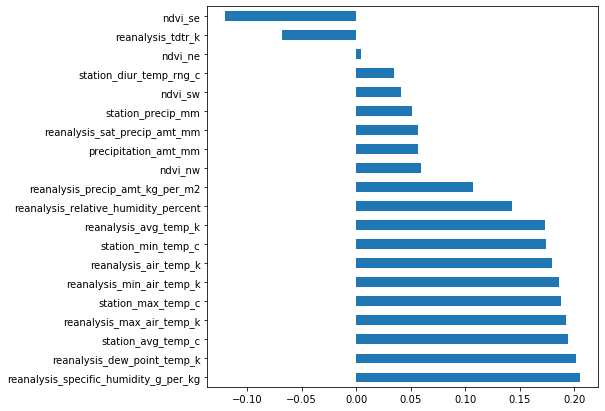

In [24]:
# San Juan
fig, ax = plt.subplots(figsize=(7,7))
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

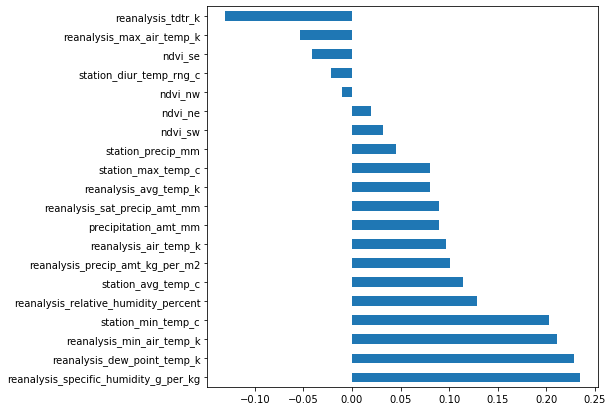

In [25]:
# Iquitos
fig, ax = plt.subplots(figsize=(7,7))
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())